In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/project1.csv')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import datetime as dt
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Modelling
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.multiclass import (
    OneVsOneClassifier,
    OneVsRestClassifier,
    OutputCodeClassifier,
)
import xgboost as xgb
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
import warnings as wr

wr.filterwarnings('ignore')
print('Libraries Imported')

Libraries Imported


In [ ]:
"""## Check for missing values and count them"""

missing_values = data.isnull().sum()
missing_values

 CurrAgeGroup                      0
Region                             0
Place of Residence                 0
Education level                    0
Head sex                           0
Head age                           0
Household wealth               24238
wealth index                       0
Religion                           0
Birth order                     8813
Current marital_status             0
Distance to health                 0
Freq. of listening to radio        0
Freq. use internet                 0
Freq. of watching TV               0
SBA                                0
ANC                                0
PNC                                0
dtype: int64

In [ ]:
"""## Converting objects to float"""

data['ANC'] = pd.to_numeric(data['ANC'], errors='coerce')

data['PNC'] = pd.to_numeric(data['PNC'], errors='coerce')

data['SBA'] = pd.to_numeric(data['SBA'], errors='coerce')

data['SBA'] = pd.to_numeric(data['SBA'], errors='coerce')

data['Distance to health'] = pd.to_numeric(data['Distance to health'], errors='coerce')


In [ ]:
"""# Getting Counts of Variables"""

variable_counts = data['wealth index'].value_counts()
print(variable_counts)

variable_counts = data['Head age'].value_counts()
print(variable_counts)

variable_counts = data['Freq. of watching TV'].value_counts()
print(variable_counts)

variable_counts = data['Religion'].value_counts()
print(variable_counts)
variable_counts = data['Birth order'].value_counts()
print(variable_counts)

variable_counts = data['Distance to health'].value_counts()
print(variable_counts)

variable_counts = data['Current marital_status'].value_counts()
print(variable_counts)

variable_counts = data['Freq. of watching TV'].value_counts()
print(variable_counts)

variable_counts = data['Freq. of listening to radio'].value_counts()
print(variable_counts)


4    7160
1    7073
3    6345
5    5836
2    5742
Name: wealth index, dtype: int64
40    1487
35    1317
45    1204
30    1160
38    1070
      ... 
89       6
16       6
15       5
93       3
94       3
Name: Head age, Length: 82, dtype: int64
2    15506
0    13238
1     3412
Name: Freq. of watching TV, dtype: int64
2     10777
3      6981
1      5665
7      4852
4      2542
96      784
10      357
9        93
5        81
8        24
Name: Religion, dtype: int64
1.0     5119
2.0     5115
3.0     4374
4.0     3088
5.0     2064
6.0     1377
7.0      937
8.0      563
9.0      368
10.0     193
11.0      90
12.0      39
13.0      12
14.0       3
15.0       1
Name: Birth order, dtype: int64
2.0    12312
1.0     4589
Name: Distance to health, dtype: int64
1    16454
0    10048
5     2218
2     1858
3     1020
4      558
Name: Current marital_status, dtype: int64
2    15506
0    13238
1     3412
Name: Freq. of watching TV, dtype: int64
2    18184
0     9560
1     4412
Name: Freq. of listening

In [ ]:
"""# Handling Missing Values"""

# Replace non-numeric values with NaN
data_numeric = data.apply(pd.to_numeric, errors='coerce')

old_number = 96
new_number = 11
data['Religion'] = data['Religion'].replace(old_number, new_number)

data.columns

data_filled = data.drop(['Household wealth', 'Birth order'], axis=1)

data_filled['Distance to health'] = data_filled['Distance to health'].fillna(data_filled['Distance to health'].median())


In [ ]:
# Fill NaN cells with the median of each column
data_filled.fillna(data_filled.median())



,CurrAgeGroup,Region,Place of Residence,Education level,Head sex,Head age,wealth index,Religion,Current marital_status,Distance to health,Freq. of listening to radio,Freq. use internet,Freq. of watching TV,SBA,ANC,PNC
0,4,1,1,0,1,35,4,7,1,1.0,2,0,2,0.0,5.0,1.0
1,5,1,1,2,1,38,5,1,1,2.0,2,1,2,1.0,4.0,1.0
2,4,1,1,1,2,33,5,1,4,2.0,2,1,1,1.0,4.0,1.0
3,5,1,1,2,1,48,5,1,1,2.0,2,1,2,1.0,4.0,1.0
4,4,1,1,1,1,36,4,11,2,1.0,0,1,2,1.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32151,2,47,1,3,1,54,5,2,0,2.0,0,1,0,1.0,4.0,1.0
32152,5,47,1,3,1,39,5,1,1,2.0,2,1,2,0.0,3.0,1.0
32153,6,47,1,1,1,39,5,1,5,2.0,0,1,2,1.0,4.0,1.0
32154,4,47,1,3,1,37,5,5,1,2.0,2,1,2,1.0,4.0,1.0


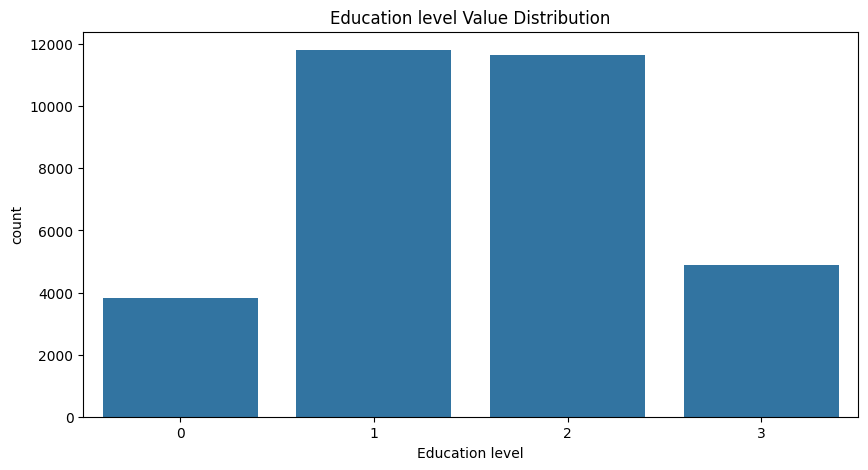

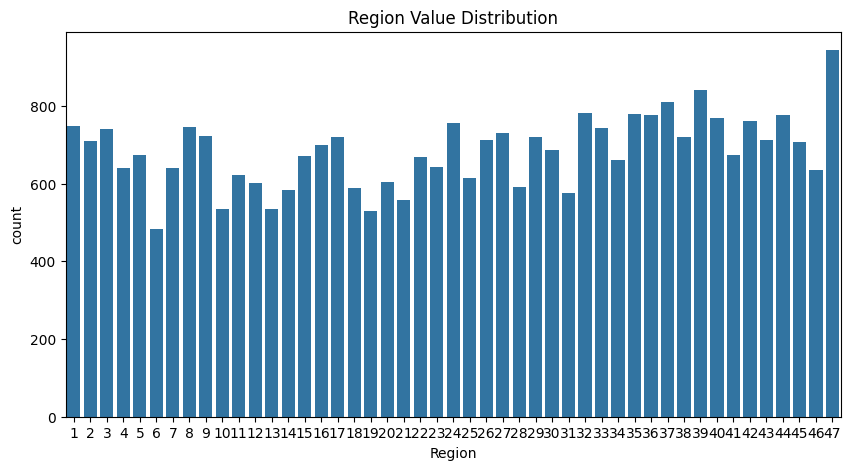

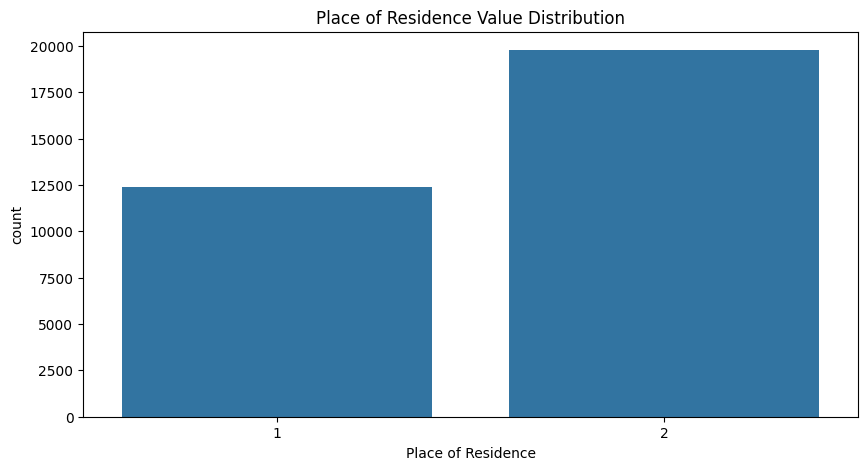

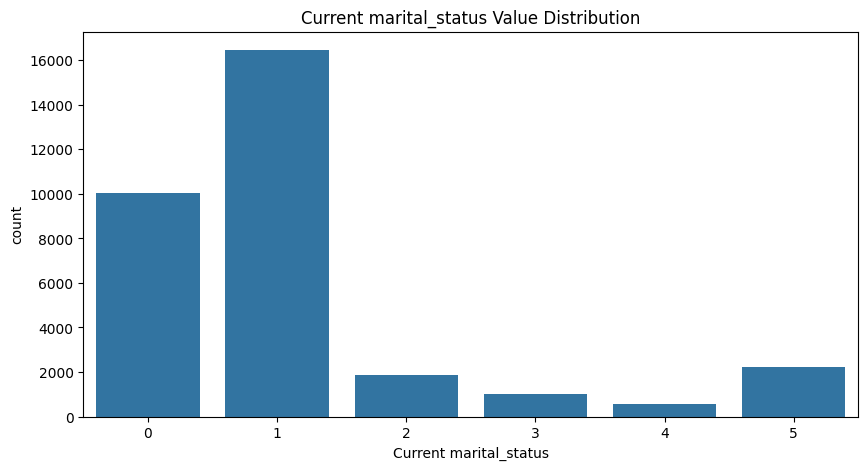

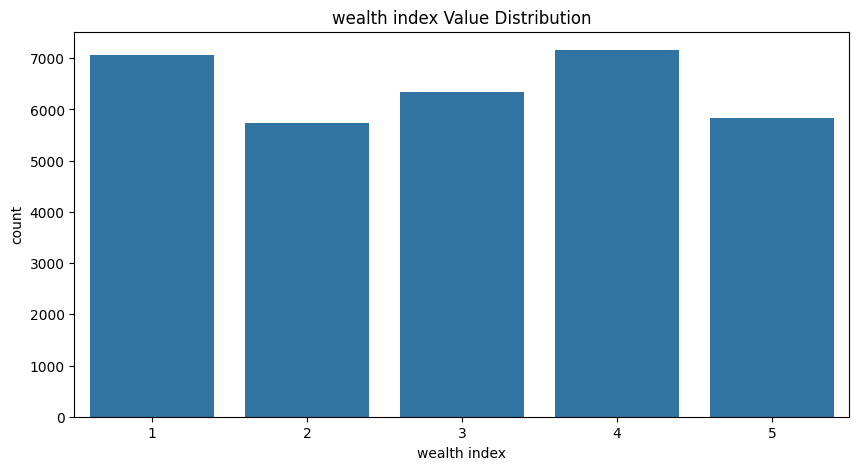

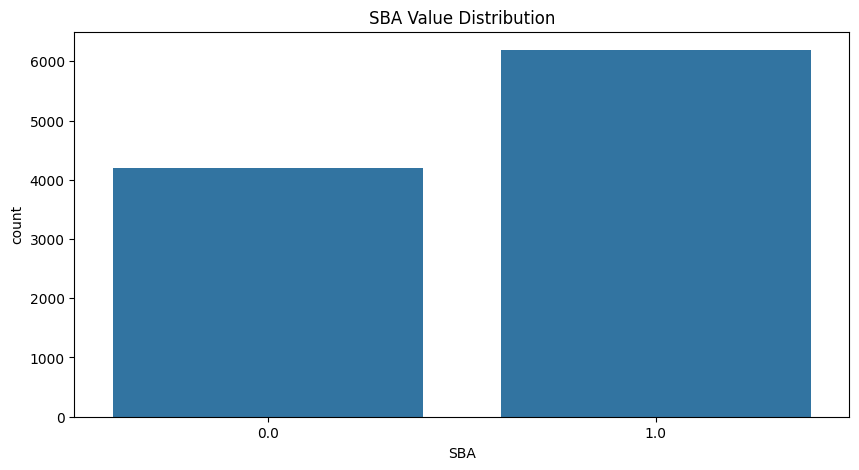

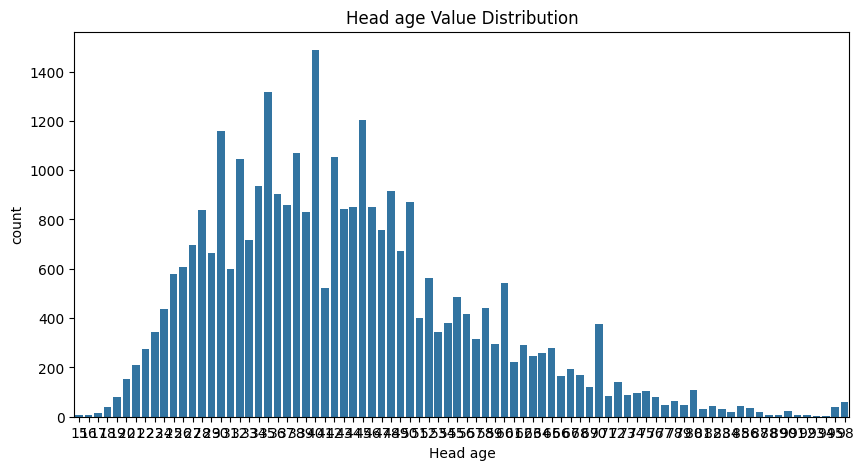

In [ ]:
"""# Exploratory Data Analysis (EDA)

"""

data_filled.describe()
cat_cols=data[['Education level','Region','Place of Residence','Current marital_status','wealth index','SBA','Head age']]

for col in cat_cols:
    plt.figure(figsize=[10,5])
    sns.countplot(data,x=data[col]).set(title= col+' Value Distribution')
    plt.show()


In [ ]:
import pandas as pd

# Assuming new_df contains your DataFrame
# Compute the correlation matrix
correlation_matrix = data_filled.corr()

import seaborn as sns
import matplotlib.pyplot as plt


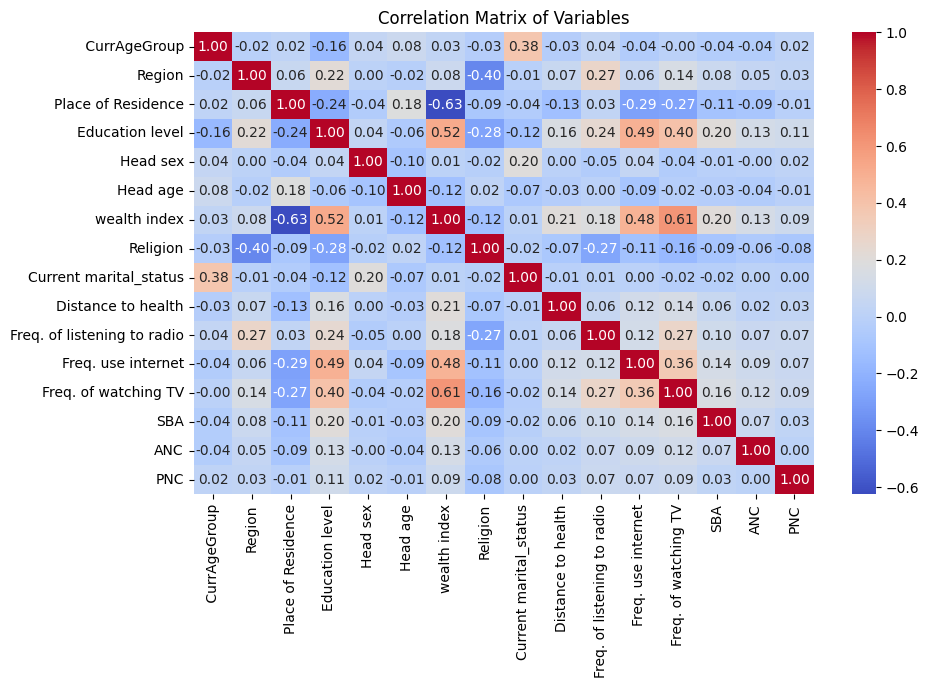

In [ ]:
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()


In [ ]:
# Set Seaborn style
sns.set_style("darkgrid")


In [ ]:
# Identify numerical columns
numerical_columns = data.select_dtypes(include=["int64", "float64"]).columns


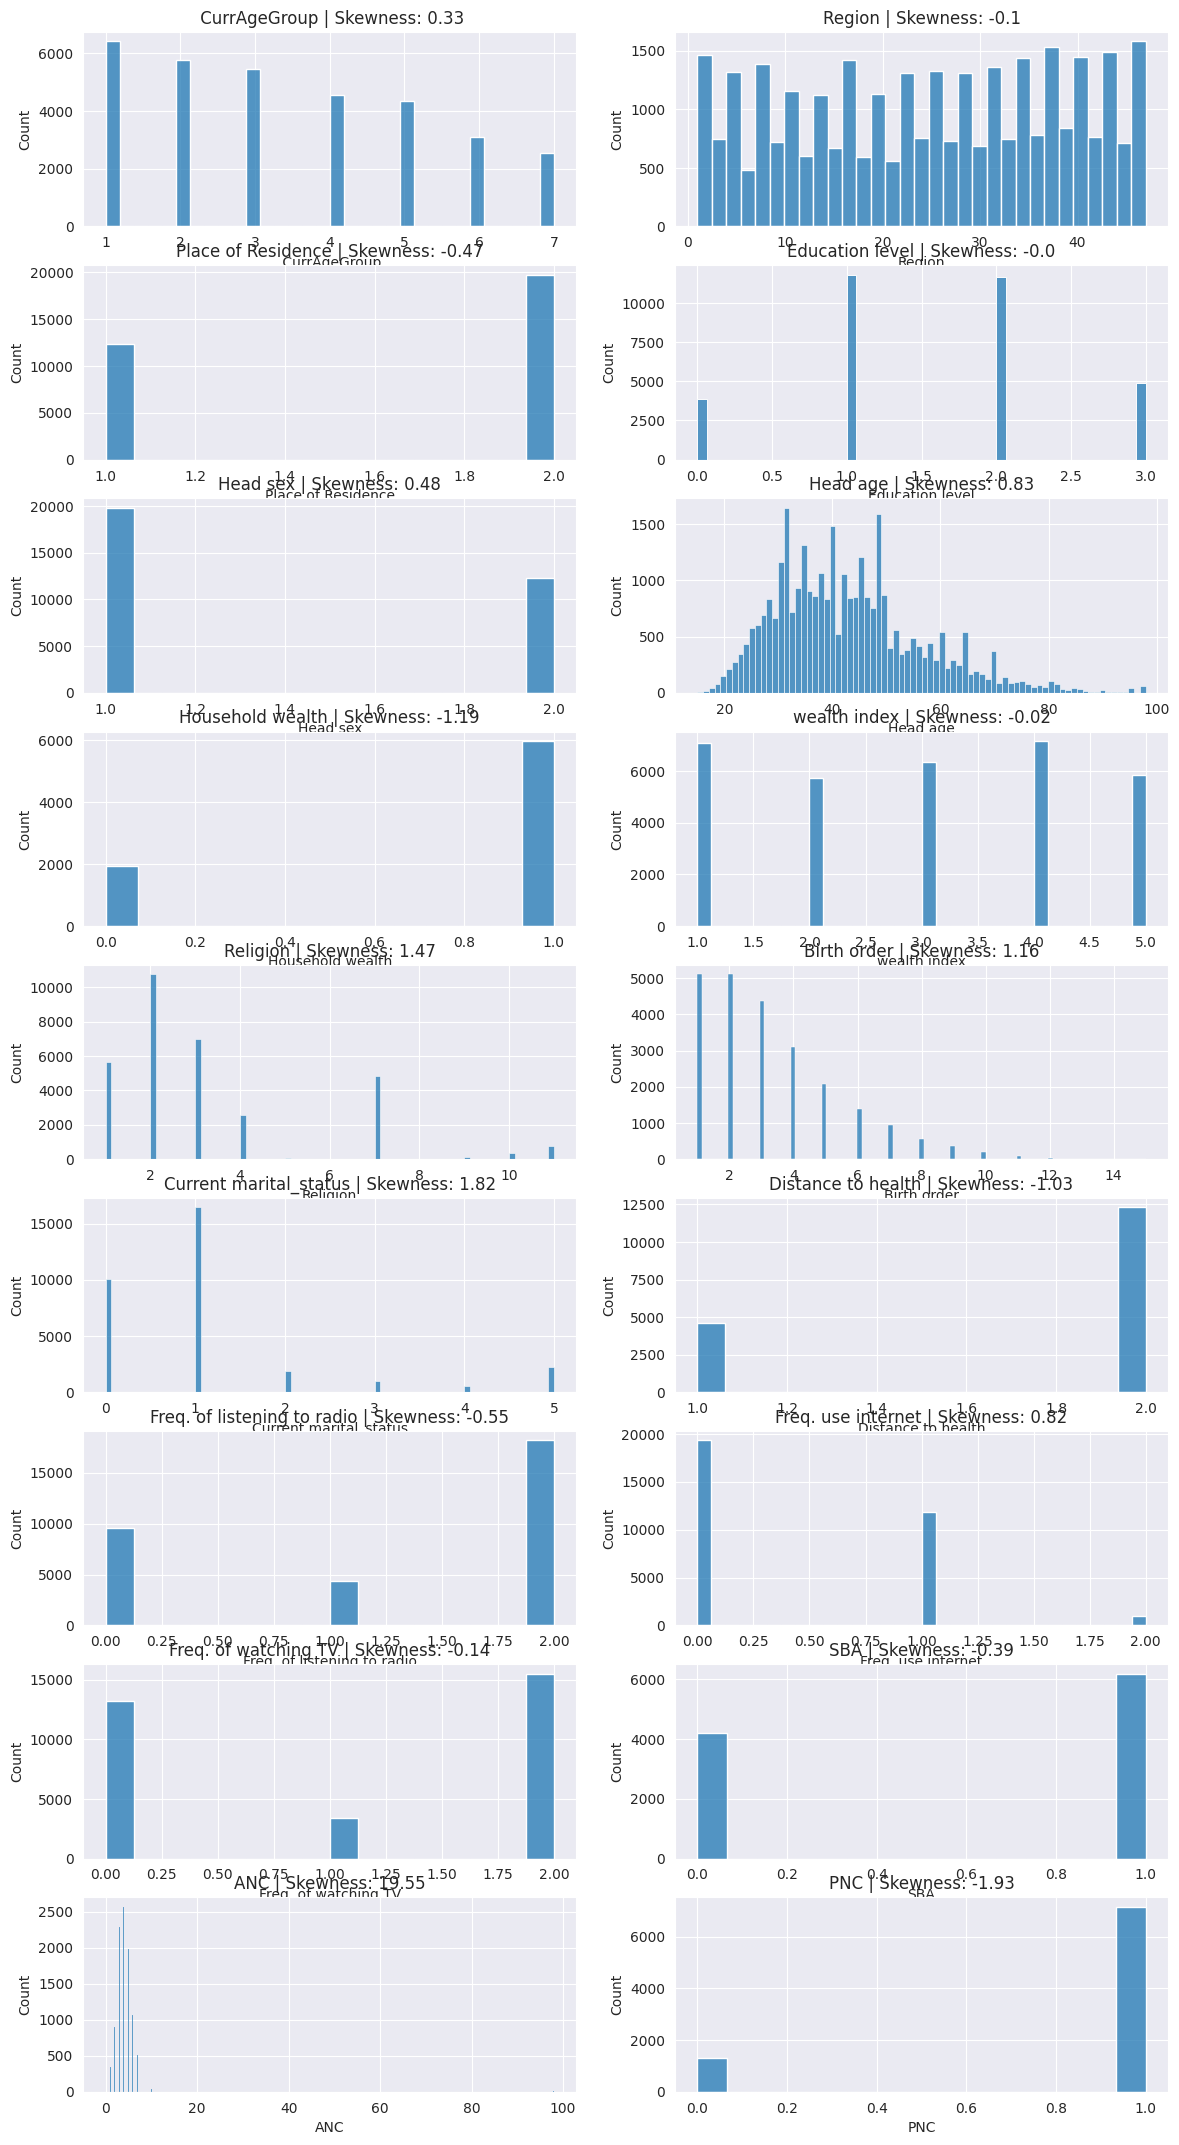

In [ ]:
# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(data[feature], kde=False)
    plt.title(f"{feature} | Skewness: {round(data[feature].skew(), 2)}")


In [ ]:
# Adjust layout and show plots
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

In [ ]:
"""# Extracting Features Variables and Target Variable

"""

X = data_filled.iloc[:, :-3].values
y = data_filled.iloc[:, -3:].values

In [ ]:
# Creating a new DataFrame with column names
columns_to_keep = data_filled.columns[:-3]  # Exclude the last three columns
new_data_X = pd.DataFrame(X, columns=columns_to_keep)

print(new_data_X.info())

print(new_data_X.dtypes)
column_names_y = data_filled.columns[-3:]  # Assuming you want to use the original column names
new_data_y = pd.DataFrame(y, columns=column_names_y)

print(new_data_y.dtypes)

new_data_y['dropout combined']=0

new_data_y.loc[new_data_y['ANC'] < 4, 'dropout combined'] = 1
new_data_y.loc[new_data_y['SBA'] == 0, 'dropout combined'] = 2
new_data_y.loc[new_data_y['PNC'] == 0, 'dropout combined'] = 3

new_data_y.drop(['ANC','SBA','PNC'], axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32156 entries, 0 to 32155
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0    CurrAgeGroup                32156 non-null  float64
 1   Region                       32156 non-null  float64
 2   Place of Residence           32156 non-null  float64
 3   Education level              32156 non-null  float64
 4   Head sex                     32156 non-null  float64
 5   Head age                     32156 non-null  float64
 6   wealth index                 32156 non-null  float64
 7   Religion                     32156 non-null  float64
 8   Current marital_status       32156 non-null  float64
 9   Distance to health           32156 non-null  float64
 10  Freq. of listening to radio  32156 non-null  float64
 11  Freq. use internet           32156 non-null  float64
 12  Freq. of watching TV         32156 non-null  float64
dtypes: float64(13)
m

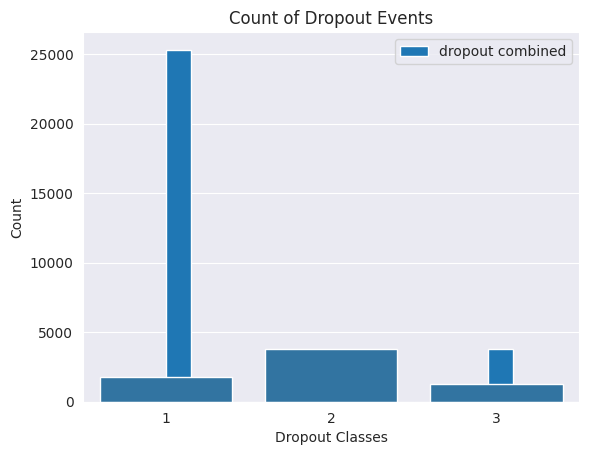

In [ ]:
"""## Visualizing Counts in Target variable"""

from matplotlib import pyplot as plt
new_data_y['dropout combined'].plot(kind='hist', bins=20, title='dropout combined')
plt.gca().spines[['top', 'right',]].set_visible(True)

import matplotlib.pyplot as plt
import seaborn as sns

filtered_data = new_data_y[new_data_y['dropout combined'] != 0]
sns.countplot(data=filtered_data, x='dropout combined')
plt.title('Count of Dropout Events')
plt.xlabel('Dropout Classes')
plt.ylabel('Count')
plt.show()


In [ ]:
"""## Handling the Data."""

# class count
class_count_1, class_count_2, class_count_3, class_count_4= new_data_y['dropout combined'].value_counts()

# Separate class
class_0 = new_data_y[new_data_y['dropout combined'] == 0]
class_1 = new_data_y[new_data_y['dropout combined'] == 1]
class_2 = new_data_y[new_data_y['dropout combined'] == 2]
class_3= new_data_y[new_data_y['dropout combined'] == 3]


In [ ]:
# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)
print('class 2:', class_2.shape)
print('class 3:', class_3.shape)

from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder


class 0: (25318, 1)
class 1: (1756, 1)
class 2: (3790, 1)
class 3: (1292, 1)


In [ ]:
# label encode the target variable
# This code prepares the target variable (new_data_y) for machine learning models that require numerical inputs
y = LabelEncoder().fit_transform(new_data_y)

X = new_data_X



In [ ]:
# transform the dataset
strategy = {0:25318, 1:40000, 2:25318, 3:40000}
oversample = SMOTE(sampling_strategy=strategy)
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))


Class=2, n=25318 (19.381%)
Class=0, n=25318 (19.381%)
Class=1, n=40000 (30.619%)
Class=3, n=40000 (30.619%)


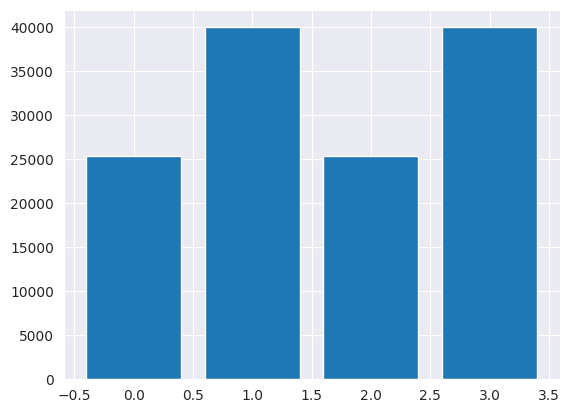

In [ ]:
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()


In [ ]:
"""# Resampled Data Analysis
# Splitting the dataset into Training and Testing sets
"""

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
"""# *Random Forest*"""

# Train a Random Forest classifier on the resampled data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)


In [ ]:
# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy on Test Set:", rf_accuracy)


Random Forest Accuracy on Test Set: 0.9352801592161666


In [ ]:
# Additional Evaluation Metrics
print("Classification Report:")
print(classification_report(y_test, rf_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.88      5134
           1       0.97      0.96      0.96      7975
           2       0.93      0.84      0.88      5101
           3       0.98      0.97      0.97      7918

    accuracy                           0.94     26128
   macro avg       0.93      0.93      0.93     26128
weighted avg       0.94      0.94      0.94     26128

Confusion Matrix:
[[4812   64  206   52]
 [ 256 7623   74   22]
 [ 538  157 4307   99]
 [ 148   29   53 7688]]


In [ ]:
# Feature Importance from the trained Random Forest model
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(feature_importance)


Feature Importance:
                        Feature  Importance
1                        Region    0.154320
5                      Head age    0.153687
0                  CurrAgeGroup    0.128607
6                  wealth index    0.082682
7                      Religion    0.081141
8        Current marital_status    0.078008
3               Education level    0.072795
10  Freq. of listening to radio    0.049145
4                      Head sex    0.043661
12         Freq. of watching TV    0.042936
11           Freq. use internet    0.040933
2            Place of Residence    0.037684
9            Distance to health    0.034400


In [ ]:
"""# *XGBoost*

Training and Testing
"""

# Train an XGBoost classifier on the resampled data
xgb_model = XGBClassifier(n_estimators=190, min_child_weight=4, subsample= 0.7999999999999999, max_depth=19, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=19, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=190, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Make predictions on the test set
xgb_predictions = xgb_model.predict(X_test)


In [ ]:
# Evaluate the model
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("XGBoost Accuracy on Test Set:", xgb_accuracy)


XGBoost Accuracy on Test Set: 0.9479102878138396


In [ ]:
# Get feature importances
xgb_feature_importances = xgb_model.feature_importances_


In [ ]:
# Sort feature importances in ascending order
sorted_indices = np.argsort(xgb_feature_importances)
sorted_feature_importances = xgb_feature_importances[sorted_indices]
sorted_columns = X_train_resampled.columns[sorted_indices]


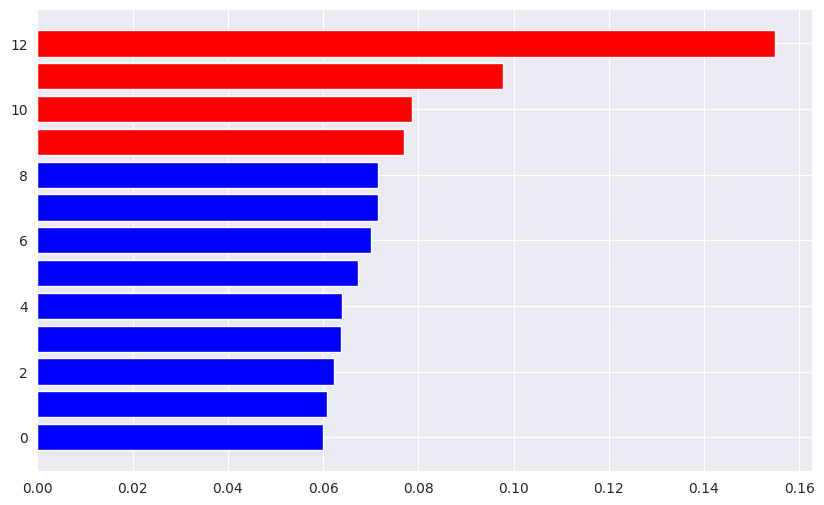

In [ ]:
# Plotting feature importance for XGBoost
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_importances)), sorted_feature_importances, color='blue')
# Highlight top 4 features in red
for i in range(1, 5):
    plt.barh(len(sorted_feature_importances) - i, sorted_feature_importances[-i], color='red')


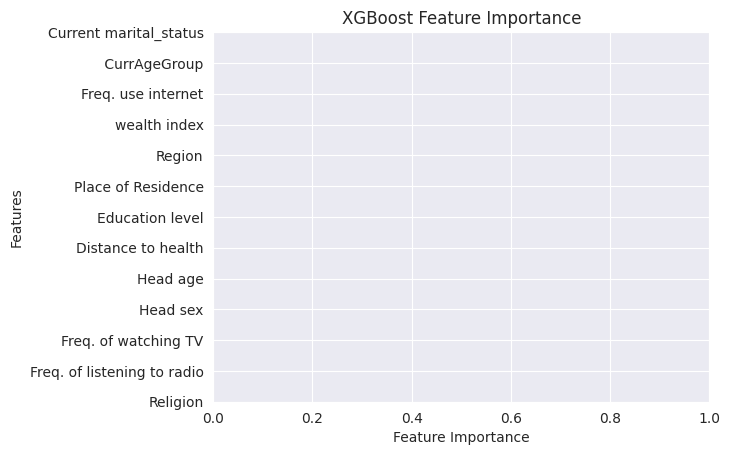

In [ ]:
# Set y-axis labels to feature names
plt.yticks(range(len(sorted_columns)), sorted_columns)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('XGBoost Feature Importance')
plt.show()


In [ ]:
# Additional Evaluation Metrics
print("Classification Report:")
print(classification_report(y_test, xgb_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      5134
           1       0.98      0.97      0.97      7975
           2       0.94      0.88      0.91      5101
           3       0.98      0.98      0.98      7918

    accuracy                           0.95     26128
   macro avg       0.94      0.94      0.94     26128
weighted avg       0.95      0.95      0.95     26128

Confusion Matrix:
[[4784   79  222   49]
 [ 194 7727   37   17]
 [ 446   83 4503   69]
 [ 119   23   23 7753]]


In [ ]:
# Feature Importance from the trained XGBoost model
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(feature_importance)


Feature Importance:
                        Feature  Importance
8        Current marital_status    0.155012
0                  CurrAgeGroup    0.097815
11           Freq. use internet    0.078666
6                  wealth index    0.077036
1                        Region    0.071630
2            Place of Residence    0.071568
3               Education level    0.069999
9            Distance to health    0.067388
5                      Head age    0.064079
4                      Head sex    0.063804
12         Freq. of watching TV    0.062308
10  Freq. of listening to radio    0.060807
7                      Religion    0.059888


In [ ]:
"""

# Determining Best HyperParameters of XGBoost Model.

"""


param_grid = {
    'n_estimators': np.arange(10, 300),
    'learning_rate': np.arange(0.1,0.2),
    'max_depth': np.arange(1, 20),
    'min_child_weight': np.arange(1, 10, 1),
    'subsample': np.arange(0.6, 1.0, 0.1),
    'colsample_bytree': np.arange(0.6, 1.0, 0.1),
    'bootstrap': [True, False]
}
xgb_model = XGBClassifier()

random_search = RandomizedSearchCV(
    xgb_model, param_distributions=param_grid, n_iter=20,
    scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1, random_state=42
)
random_search.fit(X_train, y_train)

print("Best Hyperparameters:", random_search.best_params_)



Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Hyperparameters: {'subsample': 0.7, 'n_estimators': 190, 'min_child_weight': 4, 'max_depth': 19, 'learning_rate': 0.1, 'colsample_bytree': 0.8999999999999999, 'bootstrap': True}


In [ ]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, xgb_predictions)


In [ ]:
# Print or visualize the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[4784   79  222   49]
 [ 194 7727   37   17]
 [ 446   83 4503   69]
 [ 119   23   23 7753]]


In [ ]:
## fit the model
xgb_model.fit(X, y)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
"""# Feature Importance

## *XGBoost Feature Importance*
"""

# Get feature importances
importances = xgb_model.feature_importances_
feature_names = X.columns


In [ ]:
# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})


In [ ]:
# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)


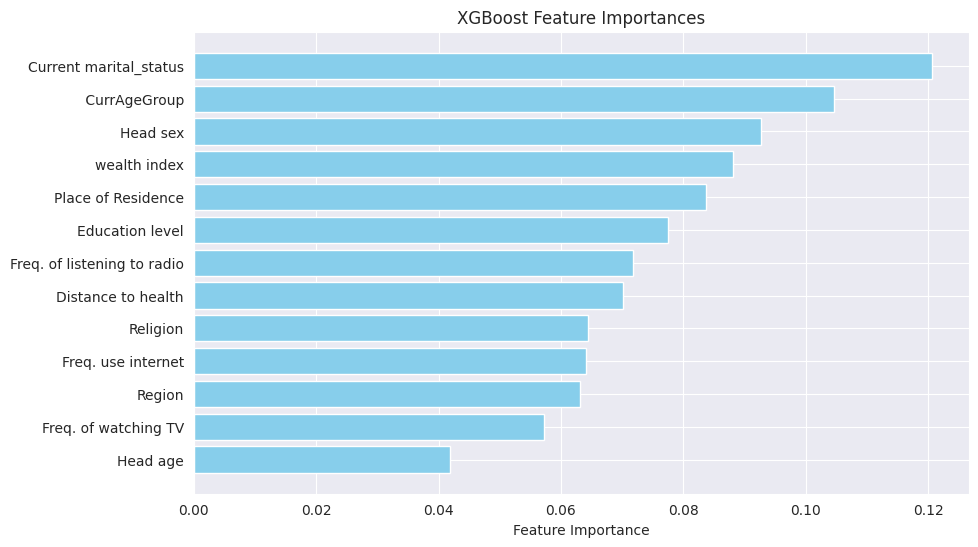

In [ ]:
# Plot the top N feature importances
top_n = 15  # You can adjust the number of features to display
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:top_n], feature_importance_df['Importance'][:top_n], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('XGBoost Feature Importances')
plt.show()
"""## *Random Forest Feature Importance*"""

# Get feature importances
importances1 = rf_model.feature_importances_
feature_names = X.columns


In [ ]:
# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances1})


In [ ]:
# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)


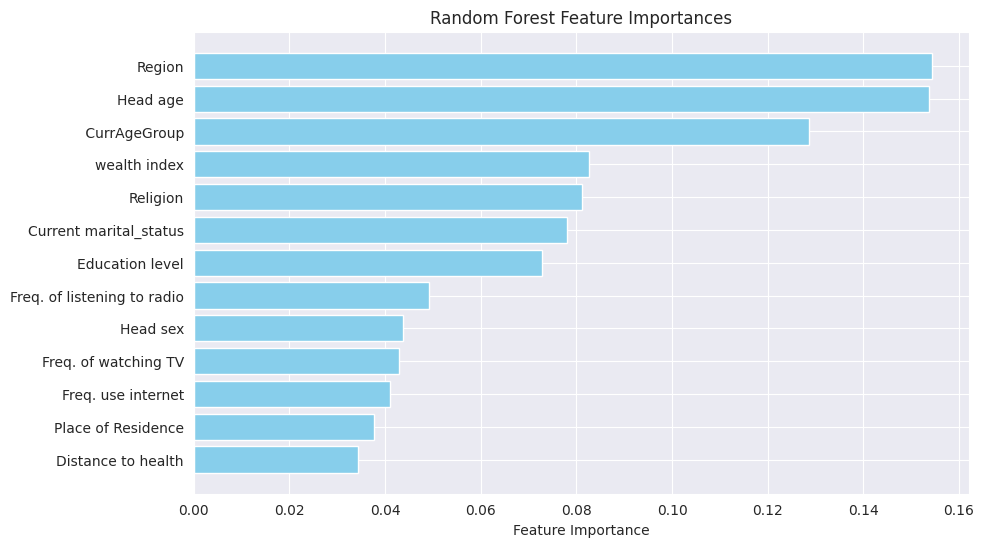

In [ ]:
# Plot the top N feature importances
top_n = 15  # You can adjust the number of features to display
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:top_n], feature_importance_df['Importance'][:top_n], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.show()
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Assuming you have imported necessary data and defined variables like X, importances1, and importances2

# Extracting features and importances
features = X.columns
importances_model1 = list(importances1.tolist())
importances_model2 = list(importances.tolist())


In [ ]:
# Check if lengths of feature lists are the same
if len(features) != len(importances_model1) or len(features) != len(importances_model2):
    raise ValueError("Lengths of feature lists and importances must be the same")


In [ ]:
# Sort features and importances by importances
sorted_indices_model1 = np.argsort(importances_model1)
sorted_indices_model2 = np.argsort(importances_model2)
sorted_features_model1 = [features[i] for i in sorted_indices_model1]
sorted_features_model2 = [features[i] for i in sorted_indices_model2]
sorted_importances_model1 = [importances_model1[i] for i in sorted_indices_model1]
sorted_importances_model2 = [importances_model2[i] for i in sorted_indices_model2]


In [ ]:
# Set width of bar
bar_width = 0.35


In [ ]:
# Set positions of bars on y-axis
r1 = np.arange(len(features))
r2 = [y + bar_width for y in r1]


<BarContainer object of 13 artists>

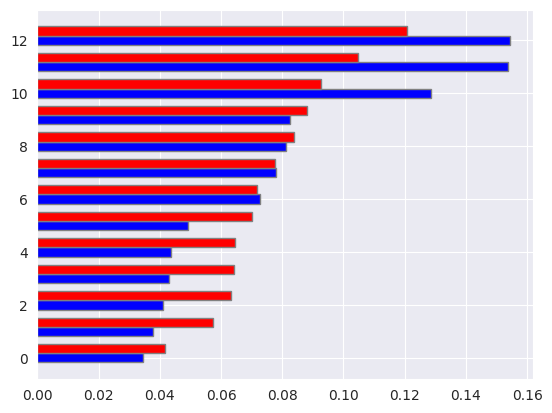

In [ ]:
# Create bar plot
plt.barh(r1, sorted_importances_model1, color='b', height=bar_width, edgecolor='grey', label='Random Forest')
plt.barh(r2, sorted_importances_model2, color='r', height=bar_width, edgecolor='grey', label='XGBoost')


([<matplotlib.axis.YTick at 0x7ba90ce59690>,
 [Text(0, 0.175, 'Head age'),
  Text(0, 1.175, 'Freq. of watching TV'),
  Text(0, 2.175, 'Region'),
  Text(0, 3.175, 'Freq. use internet'),
  Text(0, 4.175, 'Religion'),
  Text(0, 5.175, 'Distance to health'),
  Text(0, 6.175, 'Freq. of listening to radio'),
  Text(0, 7.175, 'Education level'),
  Text(0, 8.175, 'Place of Residence'),
  Text(0, 9.175, 'wealth index'),
  Text(0, 10.175, 'Head sex'),
  Text(0, 11.175, ' CurrAgeGroup'),
  Text(0, 12.175, 'Current marital_status')])

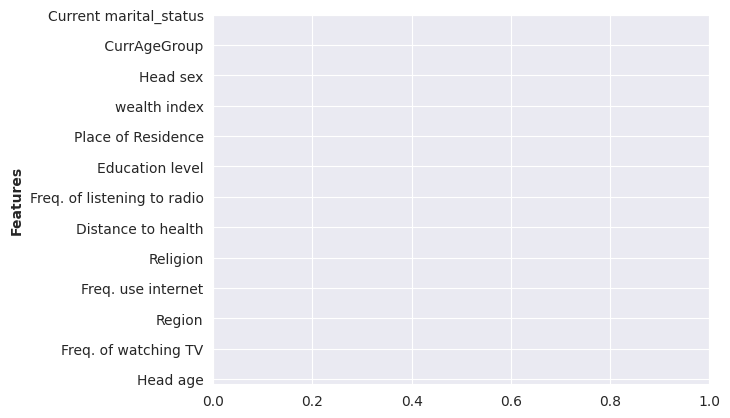

In [ ]:
# Add yticks on the middle of the group bars
plt.ylabel('Features', fontweight='bold')
plt.yticks([r + bar_width/2 for r in range(len(features))], sorted_features_model2)


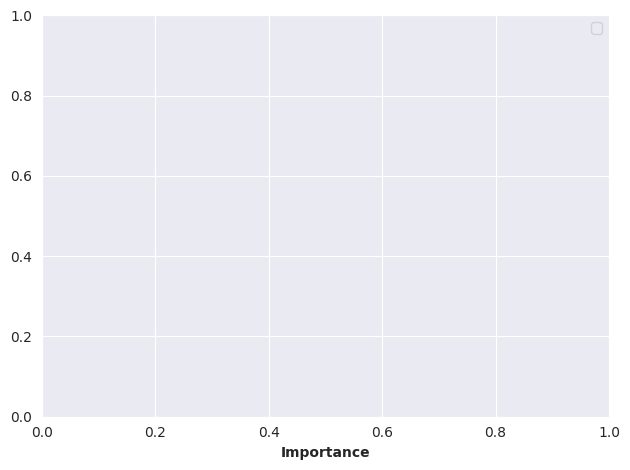

In [ ]:
# Add xlabel
plt.xlabel('Importance', fontweight='bold')

# Add legend
plt.legend()

# Show plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


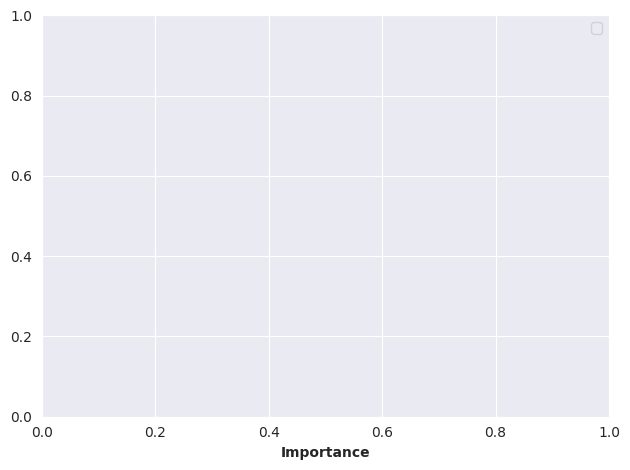

In [ ]:
# Add xlabel
plt.xlabel('Importance', fontweight='bold')

# Add legend
plt.legend()

# Show plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [ ]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, xgb_predictions)


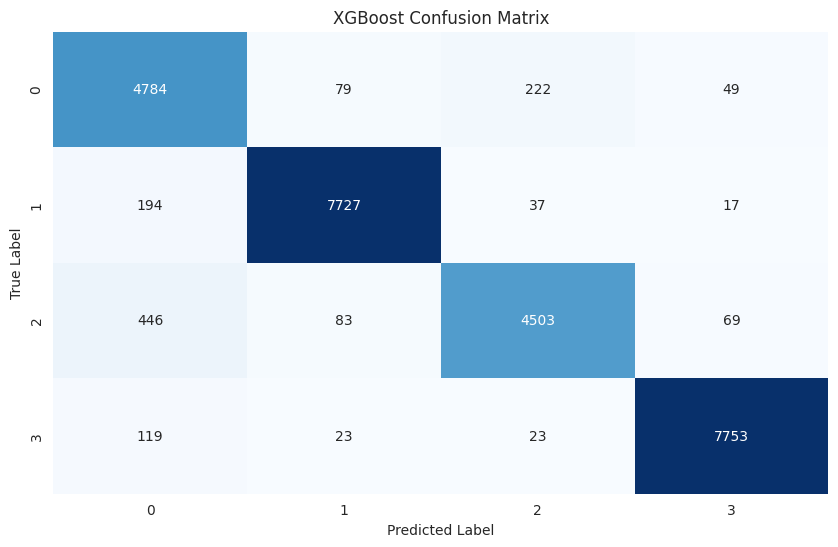

In [ ]:
# Plot an attractive confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, rf_predictions)


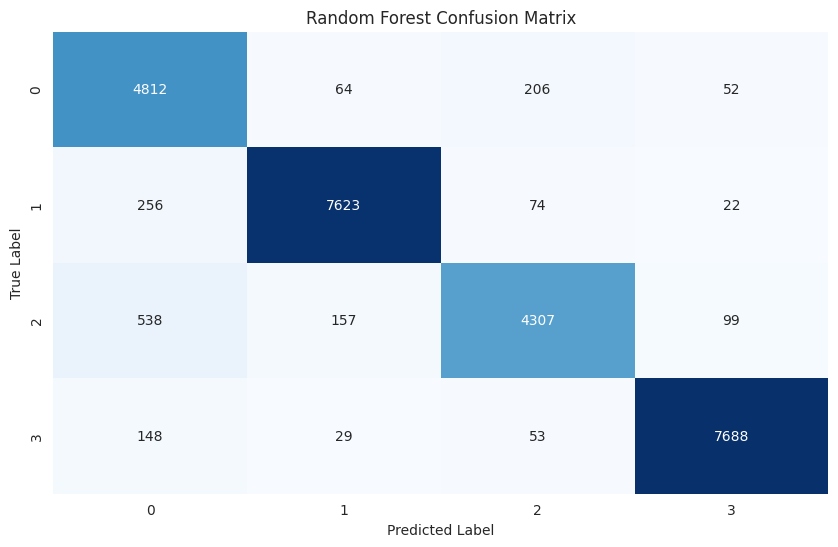

In [ ]:
# Plot an attractive confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
"""
# Downloading the Model"""

from xgboost import XGBClassifier
import joblib

In [ ]:
# Save the model to a file
joblib.dump(xgb_model, 'model.pkl')



['model.pkl']

In [ ]:
# Download the saved model file
from google.colab import files
files.download('model.pkl')

import pickle
pickle.dump(xgb_model, open('/content/model.pkl', 'wb'))
import pickle
pickle.dump(xgb_model, open('./model.sav', 'wb'))



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
"""# Geo- Mapping the Predictions"""

!pip install geopandas folium

import geopandas as gpd
import pandas as pd

In [ ]:
!ls /content/drive/MyDrive/kenya-counties-simplified.geojson

ls: cannot access '/content/drive/MyDrive/kenya-counties-simplified.geojson': No such file or directory


In [ ]:
# Load GeoJSON data for Kenyan counties
geojson_path = '/content/drive/MyDrive/kenya-counties-simplified.geojson'
kenya_geojson = gpd.read_file(geojson_path)

mnch_dropout_data = pd.DataFrame({
    'REGION': kenya_geojson['shapeName'],
    'Dropout_Rate': new_data_y['dropout combined']
})

kenya_geojson['shapeName'] = kenya_geojson['shapeName'].astype(str)
mnch_dropout_data['REGION'] = mnch_dropout_data['REGION'].astype(str)
merged_data = kenya_geojson.merge(mnch_dropout_data, left_on='shapeName', right_on='REGION')
merged_data

import folium


ERROR:fiona._env:/content/drive/MyDrive/kenya-counties-simplified.geojson: No such file or directory


DriverError: /content/drive/MyDrive/kenya-counties-simplified.geojson: No such file or directory

In [ ]:
# Create a map centered around Kenya
kenya_map = folium.Map(location=[1.2921, 36.8219], zoom_start=6)


In [ ]:
# Add choropleth layer
folium.Choropleth(
    geo_data=merged_data,
    name='choropleth',
    data=merged_data,
    columns=['REGION', 'Dropout_Rate'],
    key_on='feature.properties.shapeName',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='MNCH Dropout Rates (%)'
).add_to(kenya_map)


In [ ]:
# Add layer control
folium.LayerControl().add_to(kenya_map)
# Show the map
kenya_map

mnch_dropout_data1 = pd.DataFrame({
    'REGION': kenya_geojson['shapeName'],
    'Current marital_statusR': new_data_X['Current marital_status']
})

kenya_geojson['shapeName'] = kenya_geojson['shapeName'].astype(str)
mnch_dropout_data1['REGION'] = mnch_dropout_data1['REGION'].astype(str)

merged_data1 = kenya_geojson.merge(mnch_dropout_data1, left_on='shapeName', right_on='REGION', how='inner')
print(merged_data1.columns)

mnch_dropout_data = pd.DataFrame({
    'REGION': kenya_geojson['shapeName'],
    'CurrAgeGroup': new_data_X[' CurrAgeGroup']
})

kenya_geojson['shapeName'] = kenya_geojson['shapeName'].astype(str)
mnch_dropout_data['REGION'] = mnch_dropout_data['REGION'].astype(str)

merged_data = kenya_geojson.merge(mnch_dropout_data, left_on='shapeName', right_on='REGION')

!pip install geopandas
import folium
import geopandas as gpd


In [ ]:
# Create a map centered around Kenya
kenya_map = folium.Map(location=[1.2921, 36.8219], zoom_start=6)


In [ ]:
# Add choropleth layer
folium.Choropleth(
    geo_data=merged_data,
    name='choropleth',
    data=merged_data,
    columns=['REGION', 'CurrAgeGroup'],
    key_on='feature.properties.shapeName',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Current Age Groups'
).add_to(kenya_map)

In [ ]:
# Add layer control
folium.LayerControl().add_to(kenya_map)


In [ ]:
# Show the map
kenya_map